In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

option = "op1"
keys = ["red_wine", "white_wine"]
keys = ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]
# keys = [keys[7]]
# print(*keys)

def real_plot(key, option):
    smaller_list = []
    larger_list = []
    tpr_para_list = []
    tpr_oc_list = []
    for n in (ns := [100, 150, 200]):
        results = []
        for seed in range(num_seeds := 1):
            with open(f"real/results/{option}_{key}_{n}_{seed}.pkl", 'rb') as f:
                results += pickle.load(f)

        para_results = [result[0] for result in results if result[0] is not None]
        oc_results = [result[1] for result in results if result[1] is not None]

        p_para = np.array([result.p_value for result in para_results])
        p_oc = np.array([result.p_value for result in oc_results])
        assert len(p_para) == 1000, (key, n, len(p_para))

        tpr_para_list.append(np.mean(p_para < 0.05))
        tpr_oc_list.append(np.mean(p_oc < 0.05))
        smaller_list.append(np.mean(p_para < p_oc))
        larger_list.append(np.mean(p_para > p_oc))

    plt.figure()
    # plt.plot(ns, smaller_list, label="smaller", marker="x")
    # plt.plot(ns, larger_list, label="larger", marker="x")
    plt.plot(ns, tpr_para_list, marker="x", label='parametric')
    plt.plot(ns, tpr_oc_list, marker="x", label='oc')
    plt.xlabel("number of samples")
    plt.xticks(ns)
    plt.ylabel("Power")
    plt.ylim(-0.02, 1.02)
    plt.legend(frameon=False, loc="upper left")
    plt.grid()

    file_name = f"real/images/{option}_{key}.pdf"
    plt.savefig(file_name, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()


heating_load op1


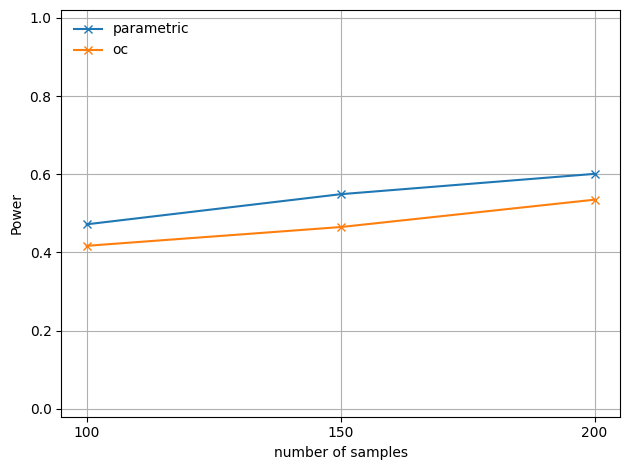

cooling_load op1


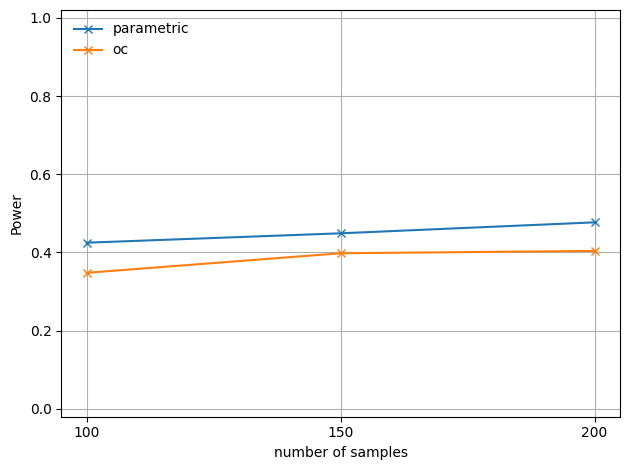

gas_turbine op1


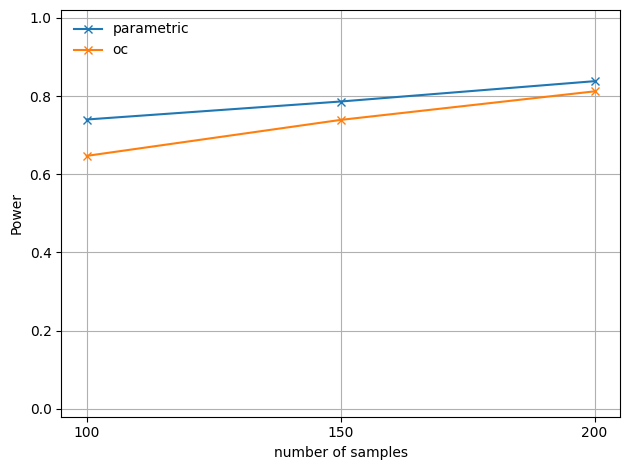

red_wine op1


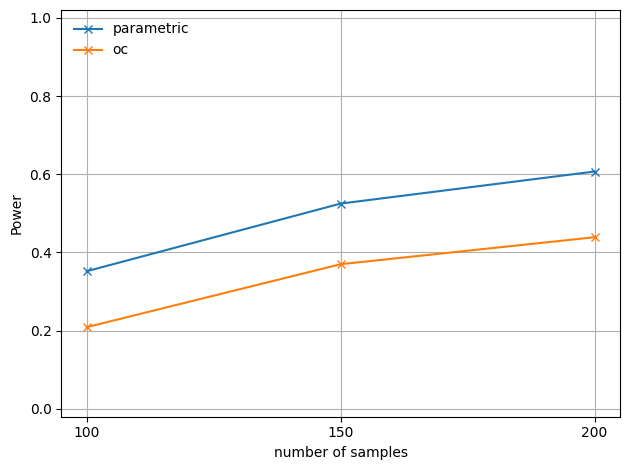

white_wine op1


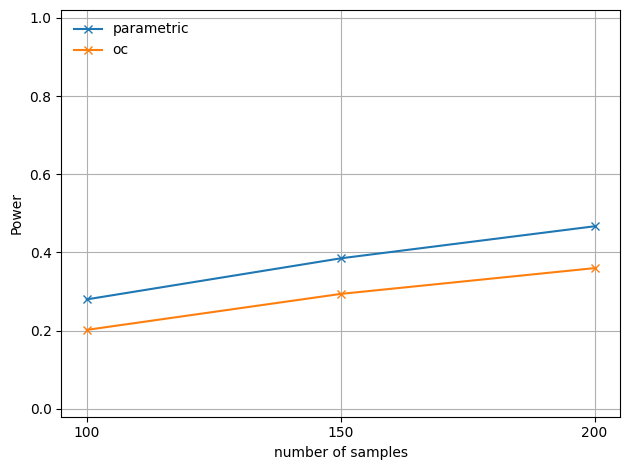

abalone op1


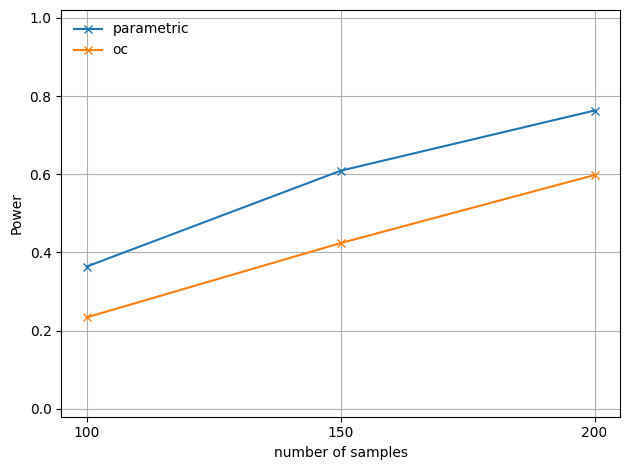

concrete op1


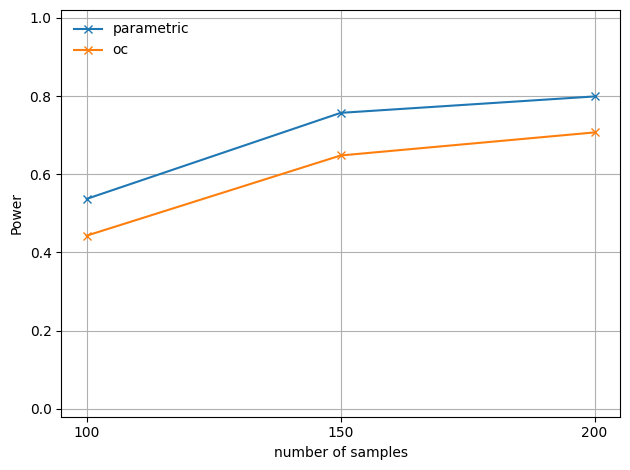

housing op1


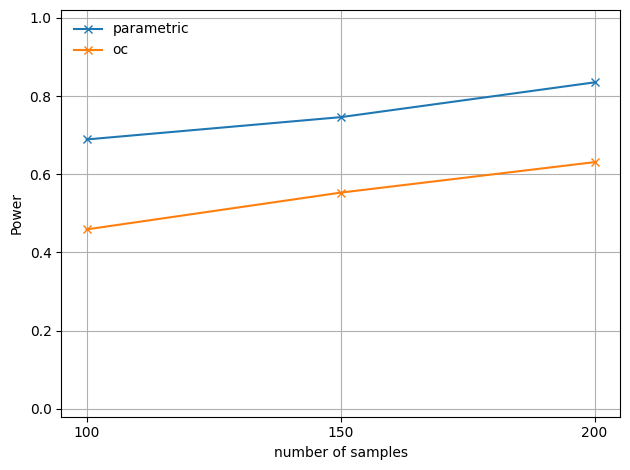

In [3]:
option = "op1"

for key in ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]:
    print(key, option)
    real_plot(key, option)

heating_load op2


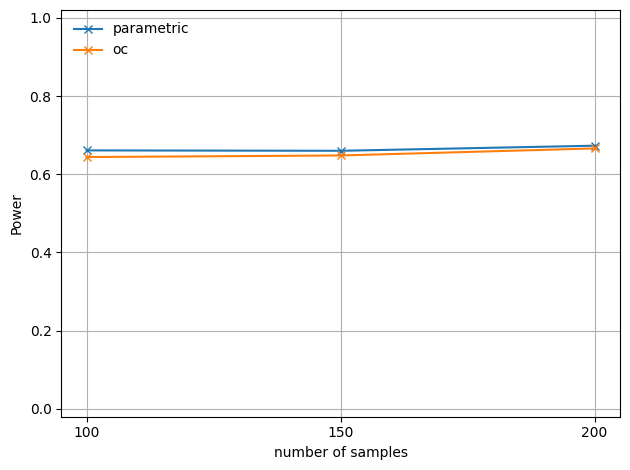

cooling_load op2


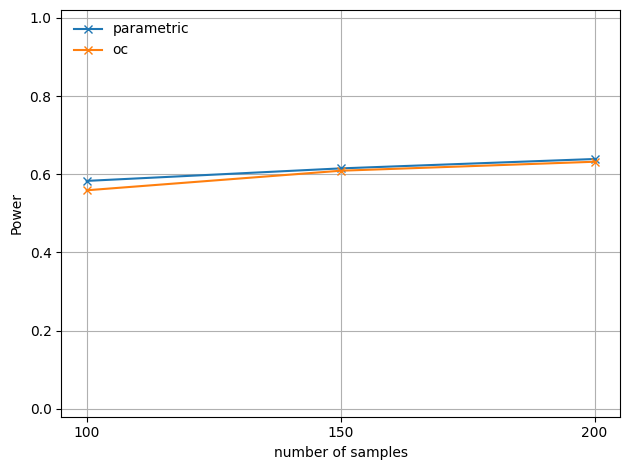

gas_turbine op2


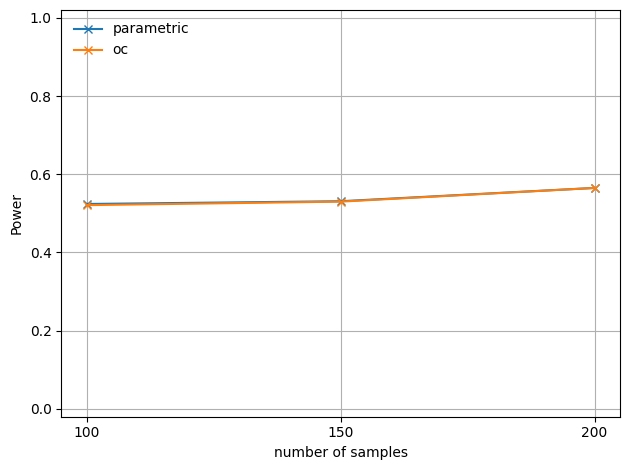

red_wine op2


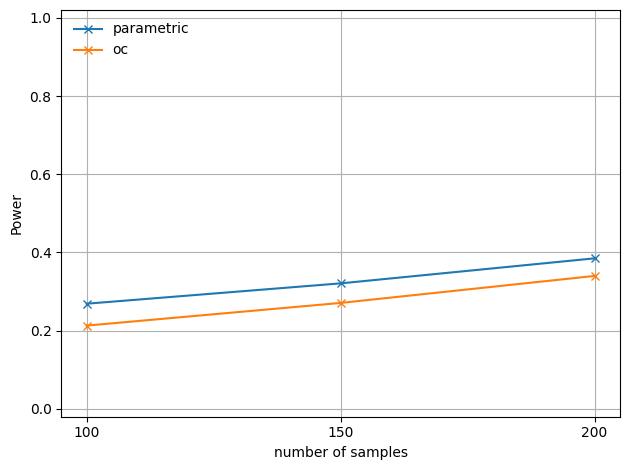

white_wine op2


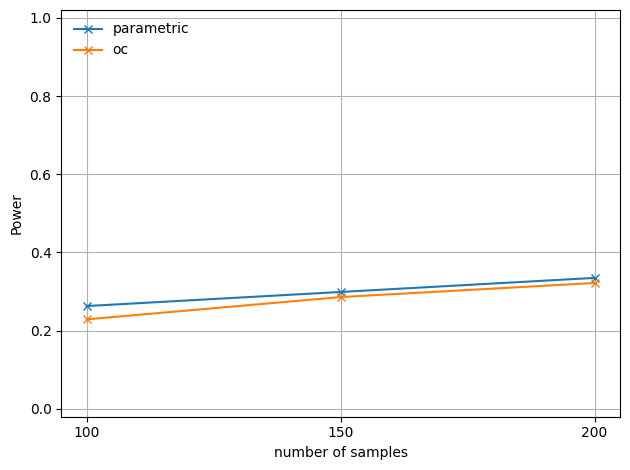

abalone op2


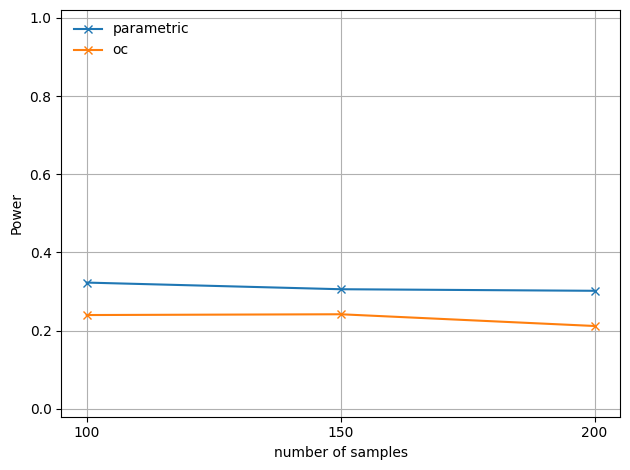

concrete op2


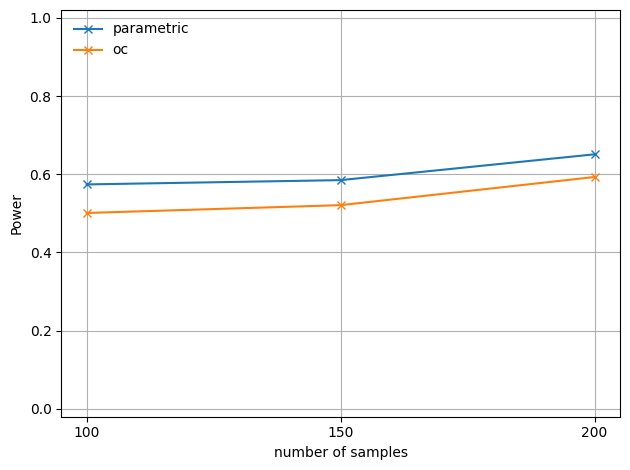

housing op2


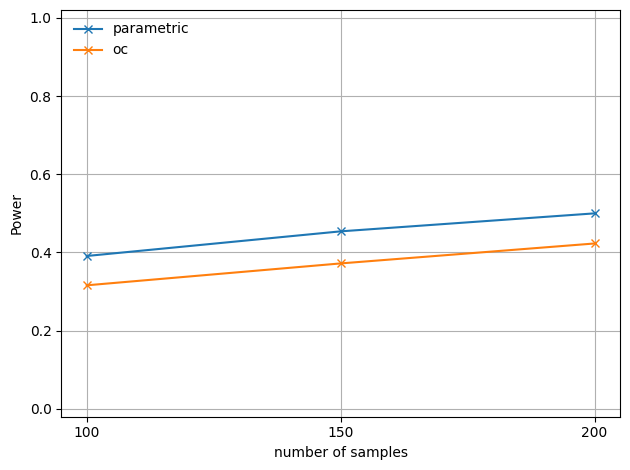

In [4]:
option = "op2"

for key in ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]:
    print(key, option)
    real_plot(key, option)

heating_load op1cv


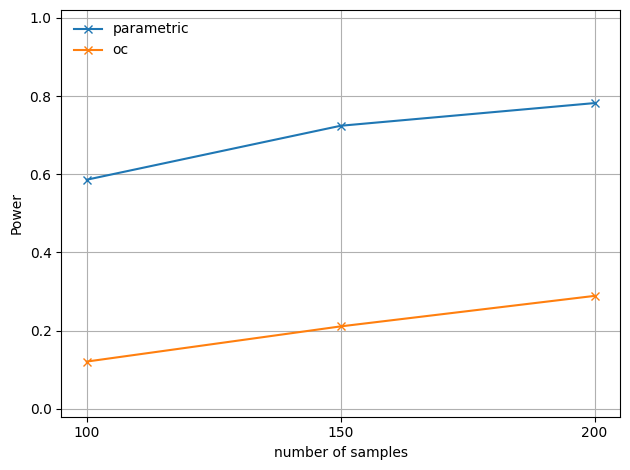

cooling_load op1cv


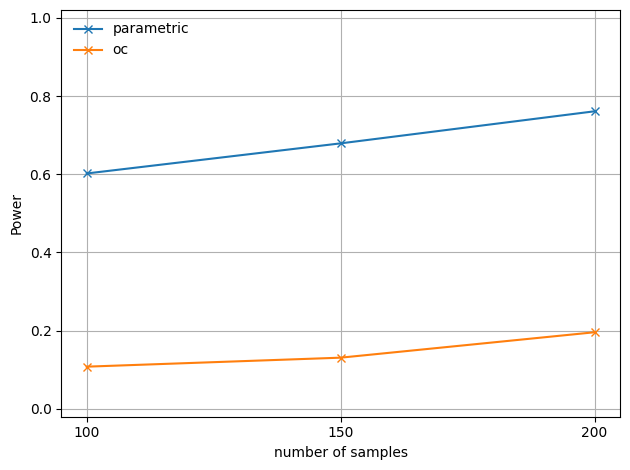

gas_turbine op1cv


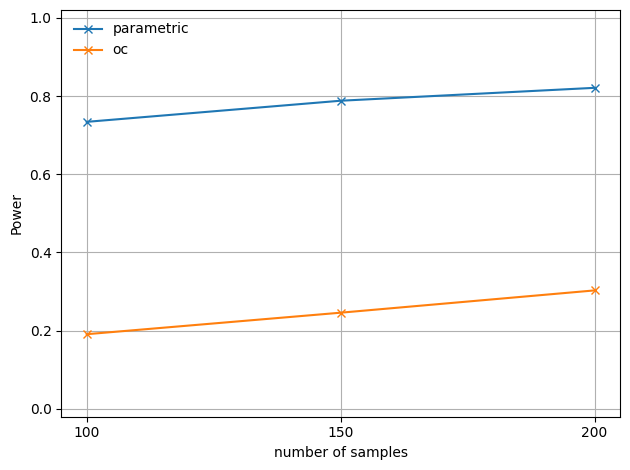

red_wine op1cv


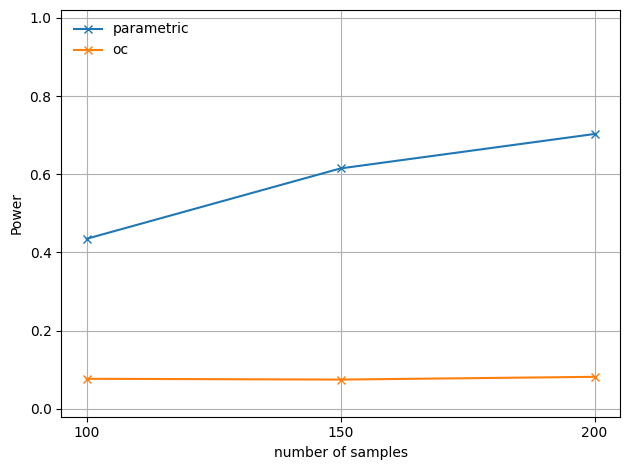

white_wine op1cv


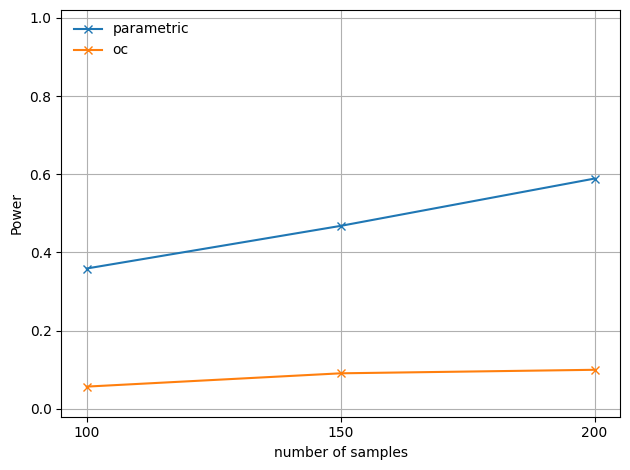

abalone op1cv


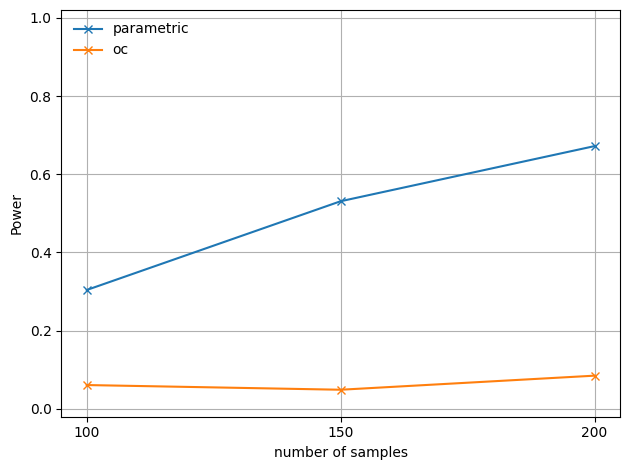

concrete op1cv


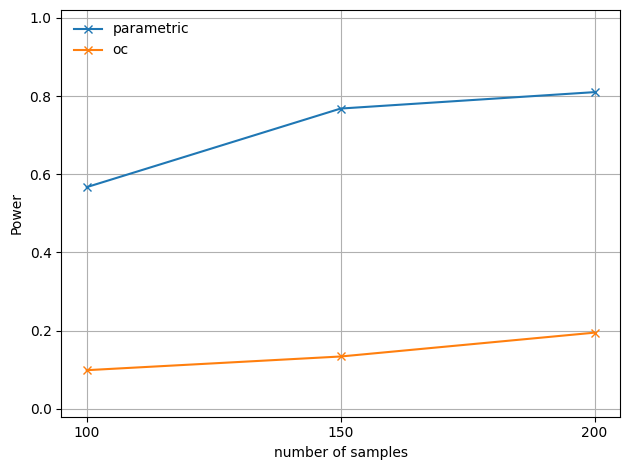

housing op1cv


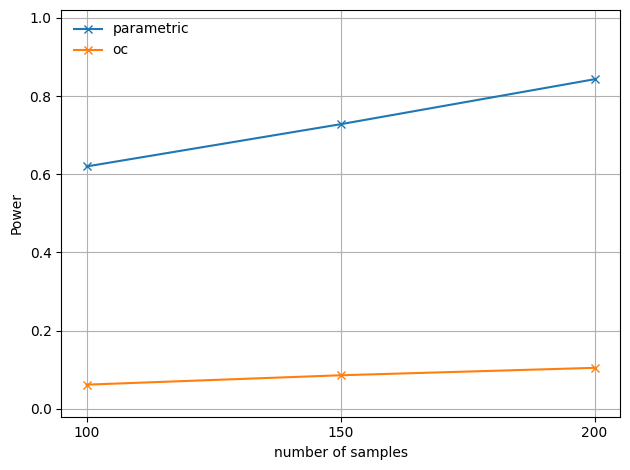

In [5]:
option = "op1cv"

for key in ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]:
    print(key, option)
    real_plot(key, option)

heating_load op2cv


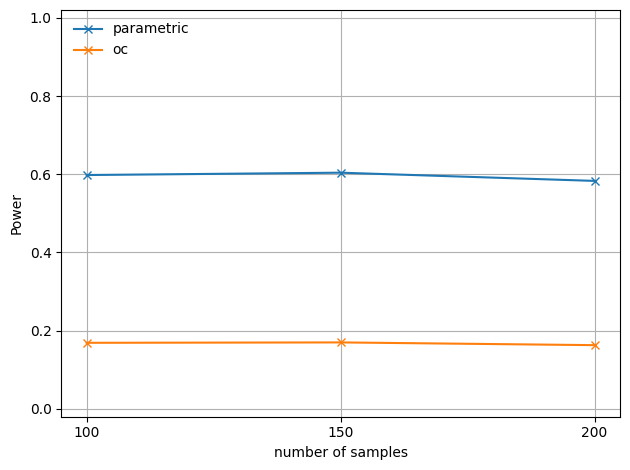

cooling_load op2cv


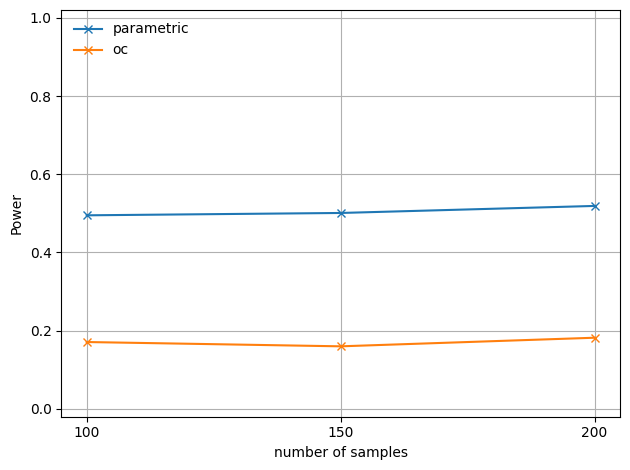

gas_turbine op2cv


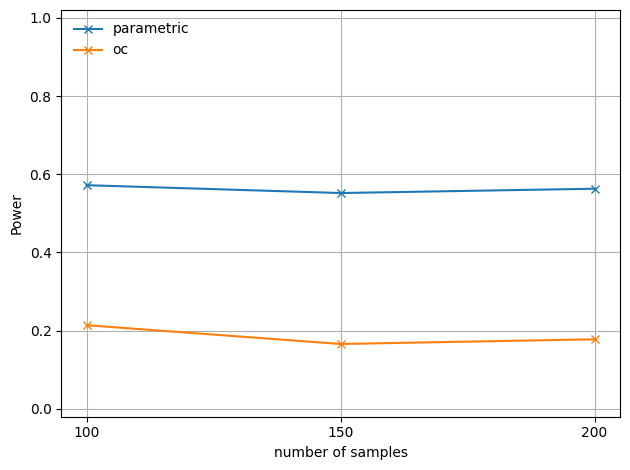

red_wine op2cv


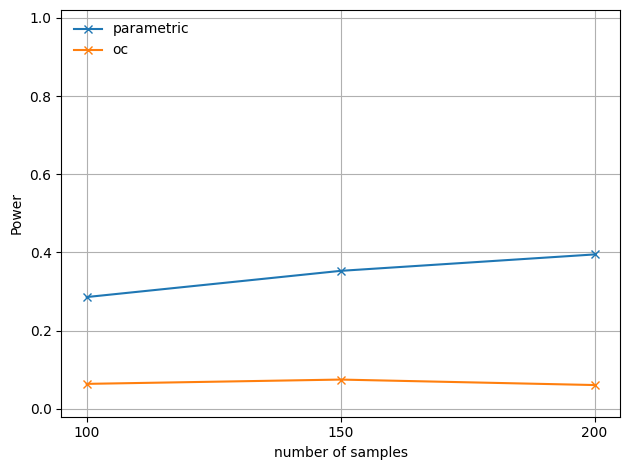

white_wine op2cv


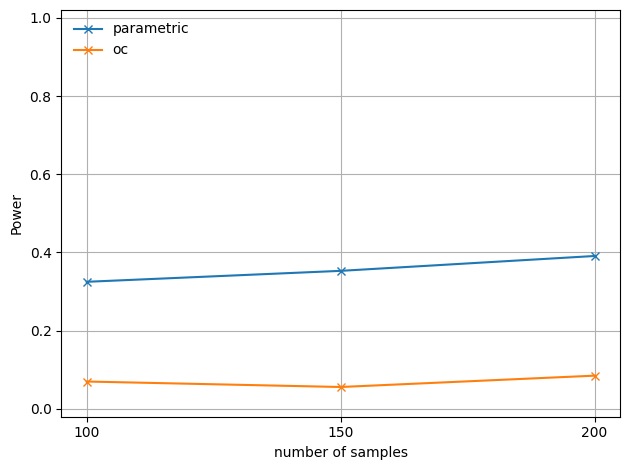

abalone op2cv


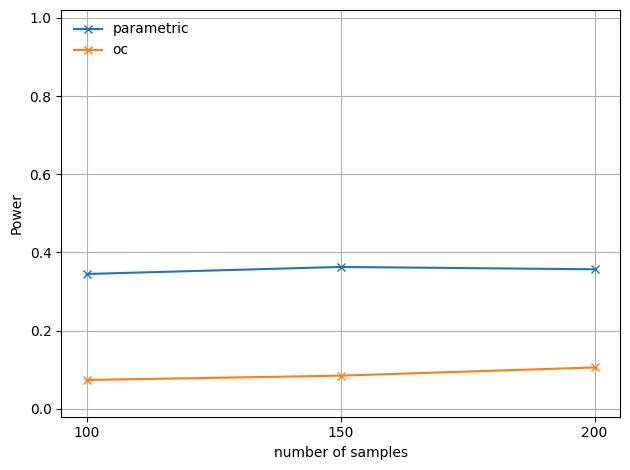

concrete op2cv


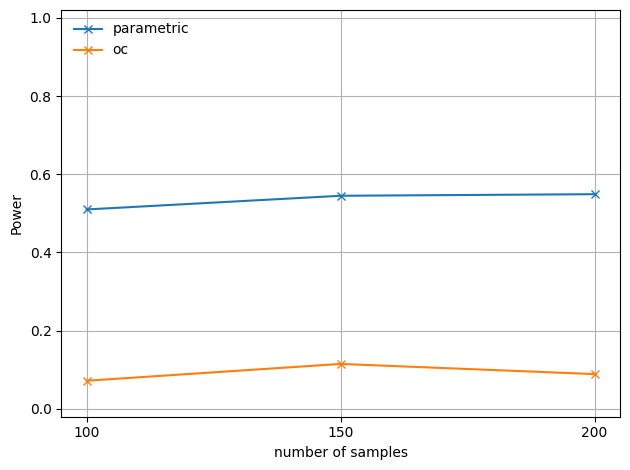

housing op2cv


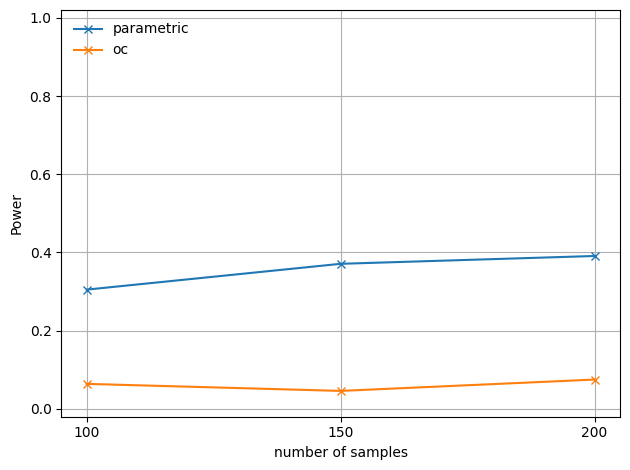

In [8]:
option = "op2cv"

for key in ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]:
    print(key, option)
    real_plot(key, option)

heating_load op12cv


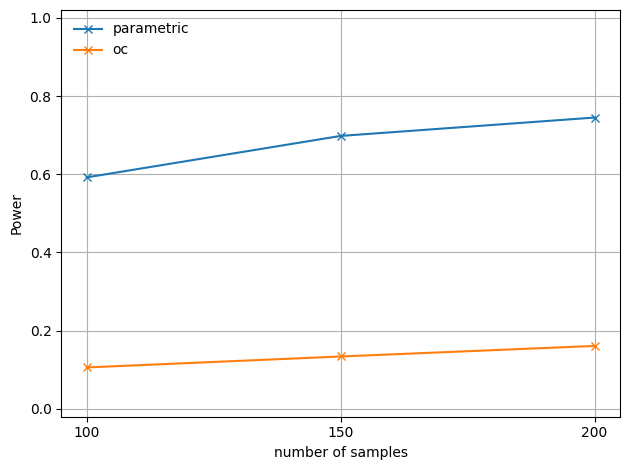

cooling_load op12cv


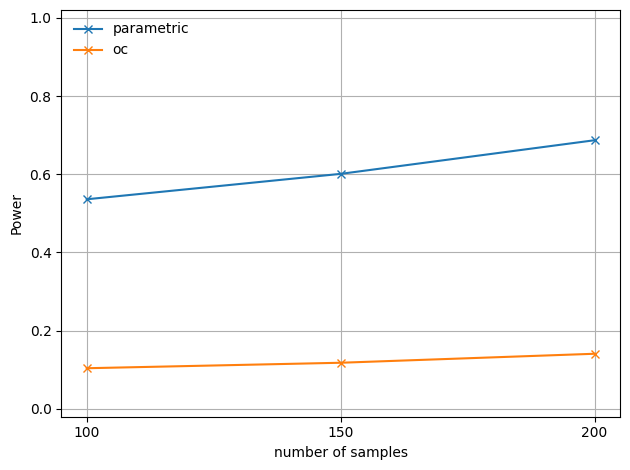

gas_turbine op12cv


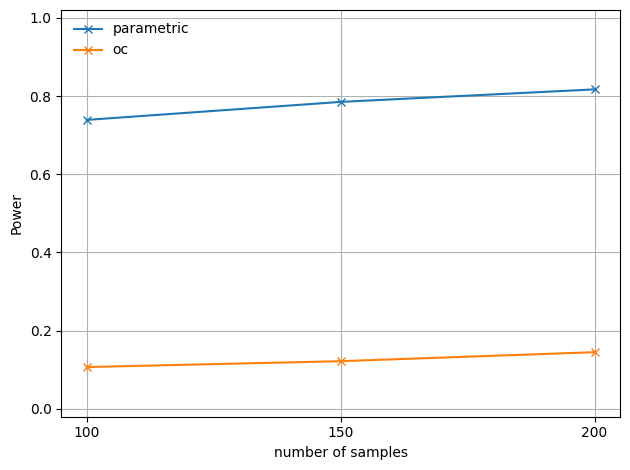

red_wine op12cv


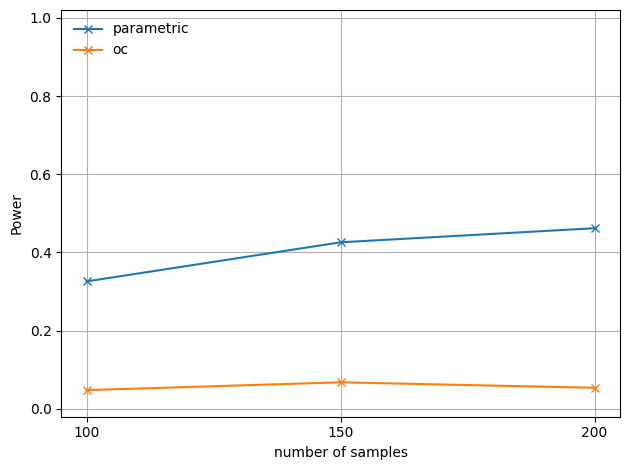

white_wine op12cv


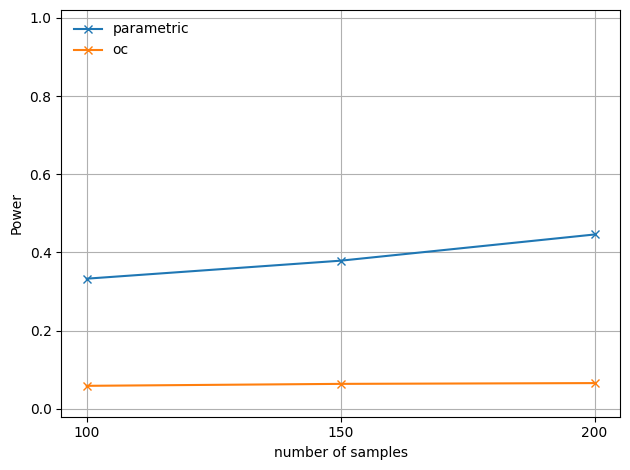

abalone op12cv


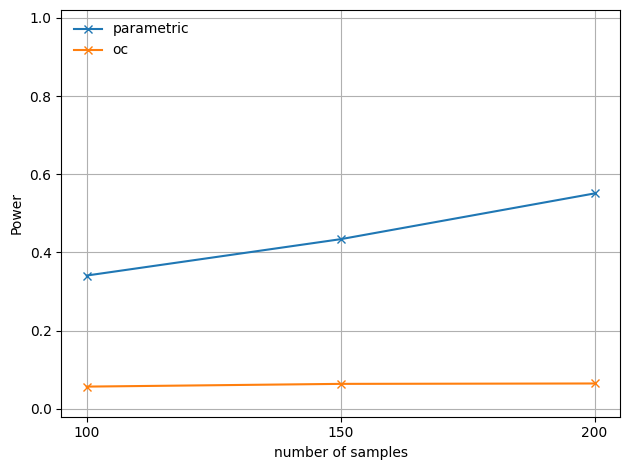

concrete op12cv


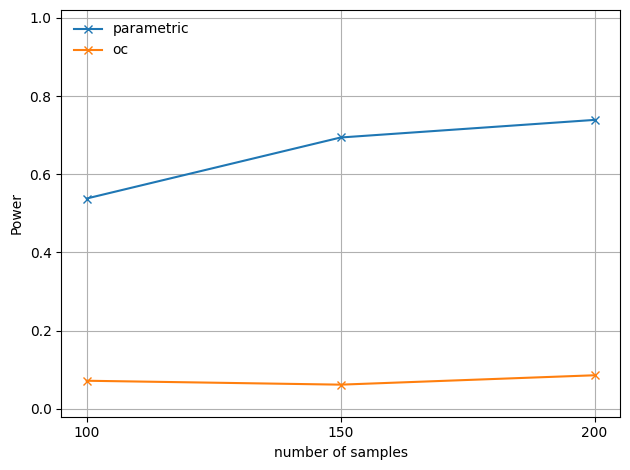

housing op12cv


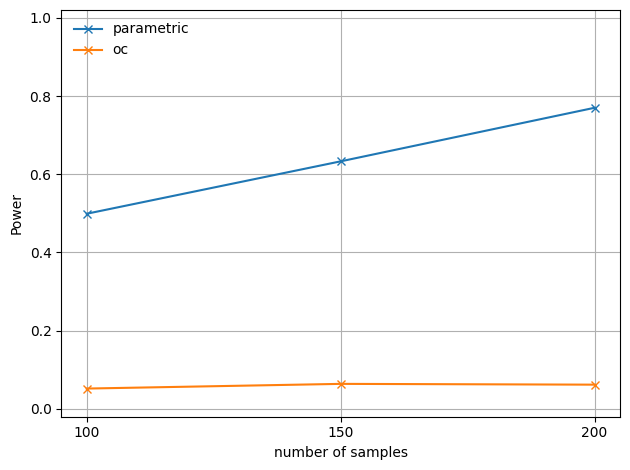

In [7]:
option = "op12cv"

for key in ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]:
    print(key, option)
    real_plot(key, option)

heating_load


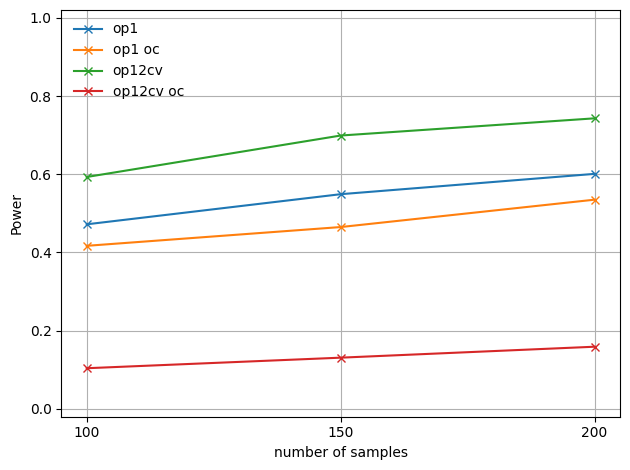

cooling_load


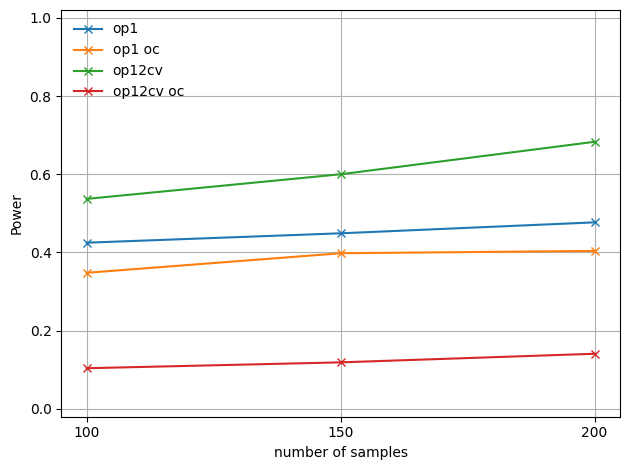

gas_turbine


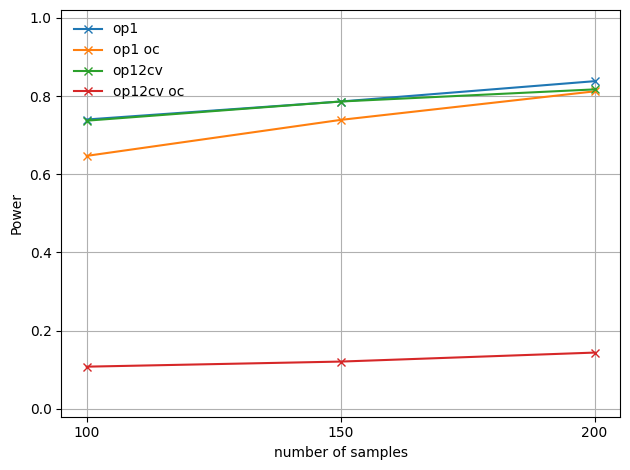

red_wine


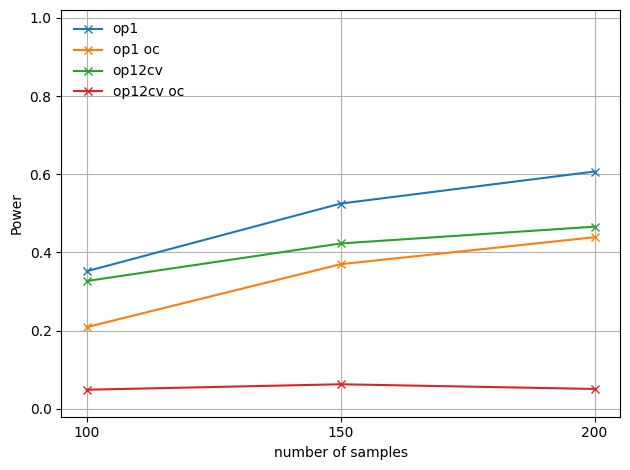

white_wine


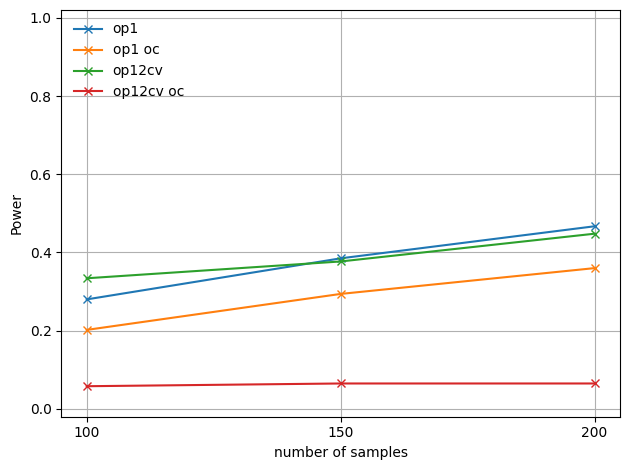

abalone


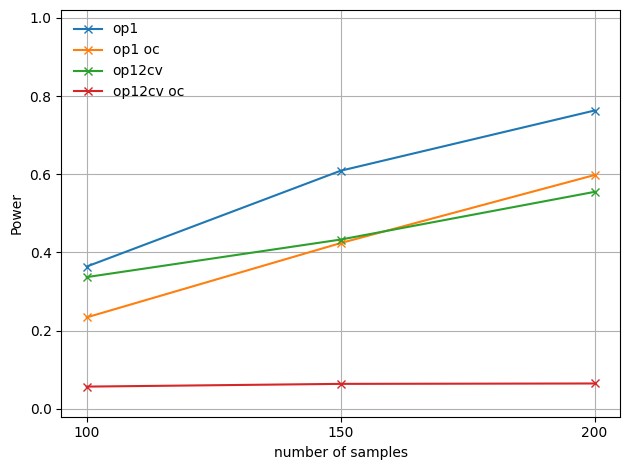

concrete


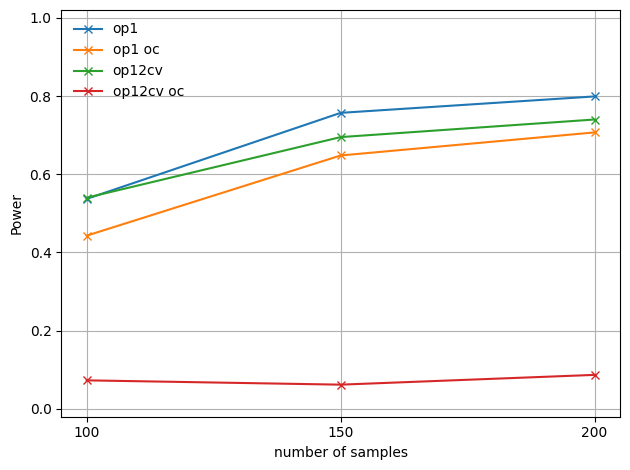

housing


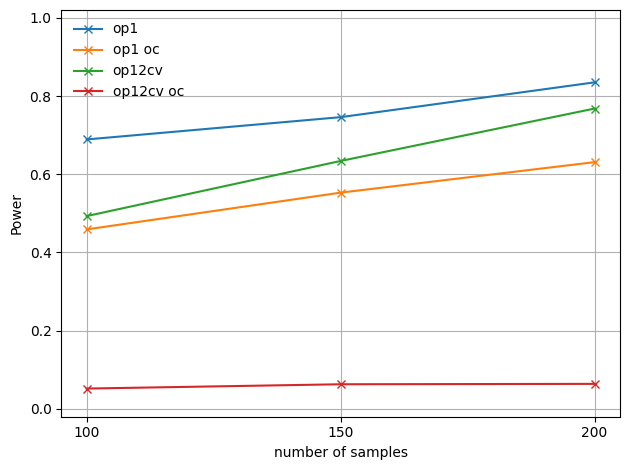

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

option = "op1"
keys = ["red_wine", "white_wine"]
keys = ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]
# keys = [keys[7]]
# print(*keys)
for key in keys:
    tpr_para_dict = {}
    tpr_oc_dict = {}
    for option in ["op1", "op12cv"]:
        smaller_list = []
        larger_list = []
        tpr_para_list = []
        tpr_oc_list = []
        for n in (ns := [100, 150, 200]):
            results = []
            for seed in range(num_seeds := 1):
                with open(f"real/results/{option}_{key}_{n}_{seed}.pkl", 'rb') as f:
                    results += pickle.load(f)

            para_results = [result[0] for result in results if result[0] is not None]
            oc_results = [result[1] for result in results if result[1] is not None]

            p_para = np.array([result.p_value for result in para_results])
            p_oc = np.array([result.p_value for result in oc_results])
            assert len(p_para) == 1000, (key, n, len(p_para))

            tpr_para_list.append(np.mean(p_para < 0.05))
            tpr_oc_list.append(np.mean(p_oc < 0.05))
            smaller_list.append(np.mean(p_para < p_oc))
            larger_list.append(np.mean(p_para > p_oc))
        tpr_oc_dict[option] = tpr_oc_list
        tpr_para_dict[option] = tpr_para_list

    print(key)
    plt.figure()
    # plt.plot(ns, smaller_list, label="smaller", marker="x")
    # plt.plot(ns, larger_list, label="larger", marker="x")
    plt.plot(ns, tpr_para_dict["op1"], marker="x", label='op1')
    plt.plot(ns, tpr_oc_dict["op1"], marker="x", label='op1 oc')
    plt.plot(ns, tpr_para_dict["op12cv"], marker="x", label='op12cv')
    plt.plot(ns, tpr_oc_dict["op12cv"], marker="x", label='op12cv oc')
    plt.xlabel("number of samples")
    plt.xticks(ns)
    plt.ylabel("Power")
    plt.ylim(-0.02, 1.02)
    plt.legend(frameon=False, loc="upper left")
    plt.grid()

    file_name = f"real/images/all_{key}.pdf"
    plt.savefig(file_name, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.show()